# Angewandte Mathematik - Adaline
Prof. Anna Kruspe

### Code Chunk

In [1]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np # nur zum Plotten in Aufgabe 07

#import session_info

### Hilfsfunktionen

In [2]:
def load_data_from_csv(file_path, skip_header=False): # lädt aktuellen Datensatz aus einer .csv-Datei und schreibt ihn in 'data'
    """
    Lädt eine CSV-Datei aus festem Pfad und gibt die Daten
    als Liste von Tupeln (label:int, x:float, y:float) zurück.
    """
    # Fester Pfad zum CSV (anpassen, wenn nötig)
    base_path = os.getcwd()     # aktuelles Arbeitsverzeichnis
    file_path = os.path.join(base_path, file_path)    # Pfad zur Datei zusammensetzen

    # Datei lesen
    with open(file_path) as f:      # Datei öffnen
        lines = f.readlines()       # alle Zeilen lesen

    data = []
    if skip_header:
        lines = lines[1:]  # Header überspringen, falls vorhanden
    for line in lines:
        parts = line.strip().split(',') # Zeile in Werte splitten
        label = int(float(parts[0]))  # Label / Target als Int
        x = float(parts[1])         #erstes Feature
        y = float(parts[2])         #zweites Feature
        data.append((label, x, y))  # Tupel speichern

    return data

In [3]:
def classify_with_predictions(data):  # Einordnung von klassifizierten Datenpunkten in vier Kategorien 
    """
    Erwartet in 'data' eine Liste von Tupeln: (label, prediction, x, y)
    Kategorisiert klassifizierte Punkte anhand ihrer Vorhersage
    und gibt vier Listen mit den Punkten (x, y) - gruppiert nach Klassifikationsergebnis - zurück.
    """

    tp = []     # True Positives: Label = +1, Vorhersage = +1
    tn = []     # True Negatives: Label = -1, Vorhersage = -1
    fp = []     # False Positives: Label = -1, Vorhersage = +1 (fälschlich positiv)
    fn = []     # False Negatives: Label = +1, Vorhersage = -1 (fälschlich negativ)

    for label, pred, x, y in data:
        if label == 1 and pred == 1:
            tp.append((x, y))
        elif label == -1 and pred == -1:
            tn.append((x, y))
        elif label == 1 and pred == -1:
            fn.append((x, y))
        elif label == -1 and pred == 1:
            fp.append((x, y))
    
    return tp, tn, fp, fn # Rückgabe der vier Gruppen

### Aufgabe 1: Funktion für allgemeine Ableitung


**Aufgabenstellung in eigenen Worten:**<br>

Es gilt die Ableitung der quadratischen Fehlerfunktion E bezüglich des i-ten Datenpunktes nach den Parametern $w_0$ und $w_j$ (in unserem Fall $w_k$) zu bestimmen.
Also konkret zwei Fälle zu unterscheiden.


**Annahmen / gegeben:**<br>

$E^{(i)} = \frac{1}{2} \left( y^{(i)} - f(\mathbf{x}^{(i)}) \right)^2$<br>

$f : \mathbb{R}^n \rightarrow \mathbb{R}, \quad f(\mathbf{x}) = w_0 \cdot 1 + \sum_{j=1}^{n} w_j \cdot x_j$<br> 

Fallunterscheidung: $k=0$ und $k>0$


**Ansatz / Umsetzung:**<br>

Um die Ableitung in Sagemath bilden zu können, müssen für die Parameter $w_j$ nach denen abgeleitet werden soll, das $j$ durch ein $k$ substituiert werden. Im Weiteren nutzen wir eine Summenfunktion, die dem $\Sigma$-Zeichen entspricht. 

In [4]:
# Definiere die variablen
var('w0 y n')
w = function('w', nargs=1)  # Gewichtsfunktion w(j) gibt das j-te Gewicht zurück
x = function('x', nargs=1)  # Featurefunktion x(j) gibt den j-ten Eingabewert zurück
j = var('j')  # Index für die Gewichtung
k = var('k')  # Index für die Ableitung

# Modellfunktion: f(x) = w0 + Summe(w(j) * x(j)) für j ∈ {1, ..., n}    
f = w0 + sum(w(j) * x(j), j, 1, n)  #sum(Summanden, Laufvariable, Startwert, Endwert)

# Quadratischer Fehler für einen Datenpunkt
E = (1/2) * (y - f)^2

# Ableitung nach w0 (Bias-Term)
dE_dw0 = diff(E, w0)

# Für die Ableitung nach w(k) (normales Gewicht)
# dE/dw(k) = dE/df * df/dw(k)
# dE/df = -(y - f)
# df/dw(k) = x(k)

assume(k, 'integer')
assume(1 <= k, k <= n)
dE_dwk = -(y - f) * x(k)

# Output
print("Modelfunktion f(x):")
print(f)
print("\nFehlerfunktion E:")
print(E)
print("\nAbleitung nach w0:")
print(dE_dw0)
print("\nAbleitung nach w(k) für alle k:")
print(dE_dwk)

# Updateregeln 
eta = var('eta')  # Lernrate
print("\nUpdateregeln:")
print(f"w0 ← w0 - η · {dE_dw0.simplify()}")
print(f"w(k) ← w(k) - η · {dE_dwk.simplify()}")

Modelfunktion f(x):
w0 + sum(w(j)*x(j), j, 1, n)

Fehlerfunktion E:
1/2*(w0 - y + sum(w(j)*x(j), j, 1, n))^2

Ableitung nach w0:
w0 - y + sum(w(j)*x(j), j, 1, n)

Ableitung nach w(k) für alle k:
(w0 - y + sum(w(j)*x(j), j, 1, n))*x(k)

Updateregeln:
w0 ← w0 - η · w0 - y + sum(w(j)*x(j), j, 1, n)
w(k) ← w(k) - η · (w0 - y + sum(w(j)*x(j), j, 1, n))*x(k)


**Antwort:**<br>

Die allgemeine Ableitung von E lautet demnach:
- $w_0: \frac{\partial E}{\partial w_0} = w_0 - y^{(i)}+\sum_{j=1}^{n} w_j x_j$

- $w_k: \frac{\partial E}{\partial w_k} = (w_0 - y^{(i)}+\sum_{j=1}^{n} w_j x_j)*x_k$


### Aufgabe 2: Spezifische Ableitung und Trainingsalgorithmus


**Aufgabenstellung in eigenen Worten:**<br>

Die allgemeine Ableitung soll nun spezifisch verwendet werden. Mit Hilfe des Gradientenabstiegsverfahren soll das Modell trainiert werden. Dabei sollen die Gewichte schrittweise mit den angegebenen Formeln angepasst werden.

**Annahmen / gegeben:**<br>

Die Gewichte sollen nach jedem Lernschritt aktualisiert werden (Online-Lernalgorithmus). Es erfolgt kein Update nach dem gesamten Batch.<br>
Die gesamte Formel für das neue Gewicht $w_k$ nach einer Iteration ist für $k \geq 0$ ,mit  $x_0=1$, $f(x)$ s. Aufgabe 1:

$$w_k \leftarrow w_k - \eta \cdot (f(\mathbf{x}^{(i)}) - y^{(i)}) \cdot x_k^{(i)}$$


**Ansatz:**<br>

Die Funktion adaline_learn() implementiert den Lernprozess:
- Bias und Gewichte sind zufällig
- Wiederholung bis zur Abbruchbedingung  über Klassifikationsfehler
- Berechnung von Prognose, Fehler und Update-Schritt

In [5]:
# Funktion bestimmt Ableitung und setzt Werte ein:
def evaluate_derivative(f_x, x_i, y_i):
    """
    Berechnet die Ableitung der Fehlerfunktion für Adaline.
    
    Parameter:
        f_x - w*x_i
        x_i - Merkmalsvektor
        y_i - Zielwert
    
    Rückgabe:
        Ableitung der Fehlerfunktion
    """
    # delta steckt in Ableitung für w_0 und w_1
    delta = -(y_i - f_x)

    # Vektor mit Ableitungen erstellen
    # dE/dw0 = -(y - f) für Bias-Term 
    # dE/dwj = -(y - f) * x_j für Feature-Gewichte
    deriv = vector(RR, [delta * x_i[j] for j in range(len(x_i))]) 
    #Hinweis: es werden nicht die symbolischen Werte aus Aufgabe 01 übernommen, sondern die Ableitung wird spezifisch neu berechnet.

    return deriv



def adaline_learn(data, eta=0.01, gamma=0.0001, max_epochs=1000):
    """
    Trainingsalgorithmus für Adaline (Algorithmus 2).

    Parameter:
        data        - Liste von Trainingsdaten [(y, x1, x2), ...]
        eta         - Lernrate
        gamma       - Toleranz für mittleren Klassifikationsfehler
        max_epochs  - maximale Anzahl Trainingsdurchläufe

    Rückgabe:
        w           - Gewichtungsvektor (einschl. Bias)
        w_hist      - Liste der Gewichte nach jeder Epoche
        mse_hist    - Liste der mittleren quadratischen Fehler
        error_hist  - Liste der Klassifikationsfehler pro Epoche
    """

    dim = len(data[0])  # Anzahl Merkmale (ohne label)
    a, b = -0.01, 0.01
    w = vector(RR, [random.uniform(a, b) for _ in range(dim)])      # Gewichte initialisieren

    # Historien
    w_hist = [w]             # Gewichtshistorie
    mse_hist = []           #MSE
    error_hist = []         # Klassifikationsfehler

    for epoch in range(max_epochs):
        # Lernschritt
        idx = list(range(len(data)))
        random.shuffle(idx)     # Daten zufällig mischen

        for i in idx:
            y_i, *features = data[i]
            x_i = vector(RR, [1.0] + features)  # Bias + Features
            f_x = w.dot_product(x_i)    #Prognose f(x) für x_i
            deriv = evaluate_derivative(f_x, x_i, y_i)  #Ableitung berechnen
            w -= eta * deriv  #Implementierung des Gradientenabstiegs / Update-Schritt

        w_hist.append(w)

        # Fehlerberechnung
        total_errors = 0
        squared_error_sum = 0
        for y_i, *features in data:
            x_i = vector(RR, [1.0] + features)
            f_x = w.dot_product(x_i)
            prediction = sign(f_x)

            squared_error_sum += (y_i - f_x)^2
            
            if prediction != y_i:
                total_errors += 1

        mse = squared_error_sum / len(data) #MSE
        avg_error = total_errors / len(data)

        mse_hist.append(float(mse))
        error_hist.append(float(avg_error))

        if avg_error <= gamma:
            print(f"Beendet an Epoch {int(epoch) + 1}: Klassifikationsfehler = {float(avg_error):.4f}")
            break

    return w, w_hist, mse_hist, error_hist


**Antwort:**<br>

Die Anwendung der Funktion findet (durch die Aufgabenstellung vorgegeben) in Aufgabe 05 statt.

### Aufgabe 3: Evaluation der Klassifikationsgüte eines Adaline-Modells


**Aufgabenstellung in eigenen Worten:**<br>

Ziel ist auszuwerten wie hoch der prozentuale Anteil richtiger Klassifikationen ist.


**Annahmen / gegeben:**<br>

Zur Auswertung des Models muss die Funktion g zusätzlich genutz werden. <br>

Woraus folgt:  $\hat{y}^{(i)} = \text{sign}\left( \vec{w} \cdot \vec{x}^{(i)} \right)$  mit $\hat{y}^{(i)}=$ Vorhersage des i.-Datenpunktes <br>


**Ansatz:**<br>

Die Vorhersage wird mit den Treffern verglichen, die Genauigkeit (Accuracy) wird demnach durch folgende Formel berechnet: <br>

$\text{accuracy} = \frac{\text{korrekte Klassifikationen}}{\text{gesamte Klassifikationen}}$

In [6]:
def adaline_evaluate(data, w, plot_result=True):
    """
    Führt Vorhersage mit gelernten Gewichten durch und plottet Ergebnis.
    
    Parameter:
        data         - Liste von (label, x1, x2)
        w            - Gewichtungsvektor (einschließlich Bias)
        plot_result  - wenn True: zeigt Diagramm mit Klassifikation
    Rückgabe:
        accuracy     - Anteil korrekt klassifizierter Punkte
    """
    correct = 0
    results = []

    for label, *features in data:
        x_vec = vector(RR, [1.0] + features)   # Eingabevektor mit Bias
        pred = sign(w.dot_product(x_vec))       # Vorhersage berechnen
        results.append(([label, pred]+ features))
        if pred == label:
            correct += 1

    accuracy = correct / len(data)

    #Plot
    if plot_result:
        plot_classified_points(results, weights=w)
    return accuracy,results

**Antwort:**<br>

Die Anwendung der Funktion findet (durch die Aufgabenstellung vorgegeben) in Aufgabe 05 statt.

### Aufgabe 4: Visualisierung des Datensatzes adaline.csv


**Aufgabenstellung in eigenen Worten:**<br>

Man soll den Datensatz adaline.csv entsprechend der Klassifizierung visualisieren.
Im Anschluss sollen alle Beobachtungen festgehalten werden.

**Annahmen / gegeben:**<br>

Der Eingabevektor $x$ ist zweidimensional. Die erste Spalte von adaline.csv zeigt die Targets auf nach denen klassifiziert werden soll (mit 1 und -1).

**Ansatz:**<br>

Um die Variablen (Features) und die Zielvariable (Target) übersichtlich zu zeigen, färben wir die Datenpunkte nach Kategorien (1,-1) und plotten auf der X-Achse die $x_1$-Werte und auf der y-Achse die $x_2$-Werte.

In [7]:
def plot_classified_points(data, x_label='x1', y_label='x2', weights=None, title='Klassifizierte Punkte'):
    """
    Universelle Plot-Funktion für klassifizierte Punkte.
    
    - data: Liste von (label, x, y) oder (label, pred, x, y)
    - weights: falls angegeben, wird Trennlinie y = mx + b gezeichnet
    
    Farben:
      - korrekt: Klasse 1 → blau, Klasse -1 → rot
      - falsch:  orange (+1 statt -1), lila (-1 statt +1)
    """
    plt.clf() # setzt vorherige Plots zurück
    
    fig, ax = plt.subplots(figsize=(6, 4))

    if len(data[0]) == 4:
        tp, tn, fp, fn = classify_with_predictions(data)
        for pts, color, label in [
            (tp, 'blue', 'Richtig: Klasse 1'),
            (tn, 'red', 'Richtig: Klasse -1'),
            (fp, 'orange', 'Falsch: +1 statt -1'),
            (fn, 'purple', 'Falsch: -1 statt +1')
        ]:
            if pts:
                xs, ys = zip(*pts)
                ax.scatter(xs, ys, label=label, color=color, s=30)
    else:
        pos = [(x, y) for label, x, y in data if label == 1]
        neg = [(x, y) for label, x, y in data if label == -1]
        if pos:
            xs, ys = zip(*pos)
            ax.scatter(xs, ys, color='blue', label='Klasse 1', s=30)
        if neg:
            xs, ys = zip(*neg)
            ax.scatter(xs, ys, color='red', label='Klasse -1', s=30)

    # Trennlinie zeichnen
    if weights is not None and weights[2] != 0:
        x_vals = [0, max(x for *_, x, _ in data) + 1]
        m = -weights[1] / weights[2]
        b = -weights[0] / weights[2]
        y_vals = [m * x + b for x in x_vals]
        ax.plot(x_vals, y_vals, 'k--', label='Trennlinie')

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc='best')
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

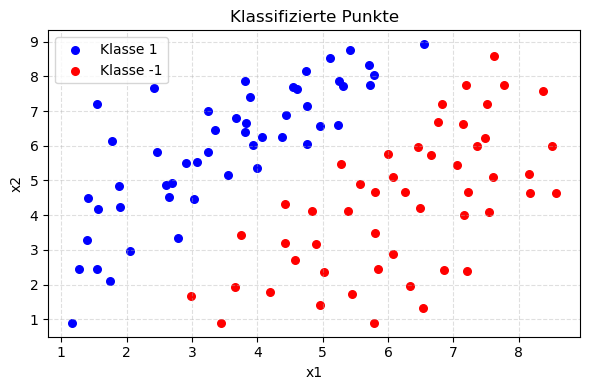

In [8]:
# Daten laden
data = load_data_from_csv("adaline.csv", skip_header=False)

# Visualisierung aufrufen
plot_classified_points(data, x_label="x1", y_label="x2", title="Klassifizierte Punkte")

**Antwort:**<br>

Durch die Visualisierung wirken die Daten 2-Dimensional, sind aber in Realität 3-Dimensional.<br>
Die Punktewolke bildet eine klare Trennung, durch die gut eine Gerade / Hyperplane gelegt werden kann.
Sie scheint linear trennbar zu sein.

### Aufgabe 5: Testen und evaluieren mit Adaline.csv


**Aufgabenstellung in eigenen Worten:**<br>

Man soll die bereits implementierten Funktionen adaline_learn() und adaline_evaluate() auf den Datensatz adaline.csv anwenden und das Ergebnis evaluieren.

**Annahmen / gegeben:**<br>

adaline.csv beinhaltet linear trennbare Daten, die in unserem Adaline zu einem Lernschritt führen.

**Ansatz:**<br>

Wir möchten folgende Fragen beantworten:
 - Konvergieren die Gewichte zu gewissen Werten?
 - Welche Daten wurden richtig klassifiziert?
 - Wird der quadratische Fehler tatsächlich kleiner?
 - Wird die Genauigkeit (accuracy) höher?   
 
Dazu verwenden wir die Daten der Gewichte, welche aus der adaline_learn-, adaline_evaluate- & classify_with_predictions-Funktion mit jeder Iteration zur Verfügung gestellt werden.
Anschließend plotten wir diese verschiedenen Daten.



Beendet an Epoch 7: Klassifikationsfehler = 0.0000
Epoch  1: w=(-0.00464634342436372, 0.00707313076175777, 0.00495194057119673)  Acc= 95.0%  MSE=0.337970
Epoch  2: w=(0.0376233497080131, -0.373765115432124, 0.283613271679936)  Acc= 88.0%  MSE=0.374751
Epoch  3: w=(0.0944960075456101, -0.333341412638298, 0.351996071999280)  Acc= 90.0%  MSE=0.322685
Epoch  4: w=(0.148527413503593, -0.316045161152770, 0.311101640009028)  Acc= 91.0%  MSE=0.321570
Epoch  5: w=(0.180600115973572, -0.344664374815540, 0.334120852365841)  Acc= 89.0%  MSE=0.365965
Epoch  6: w=(0.227298977516156, -0.366919103891194, 0.359783679267362)  Acc= 90.0%  MSE=0.332587
Epoch  7: w=(0.266376829994646, -0.350046576282787, 0.329609959663426)  Acc=100.0%  MSE=0.280305


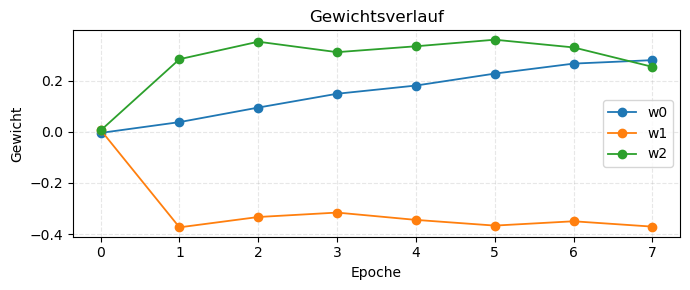

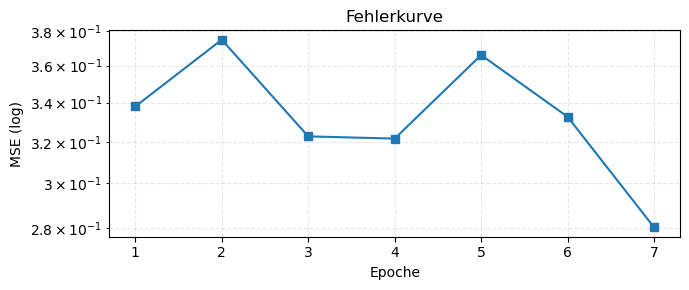

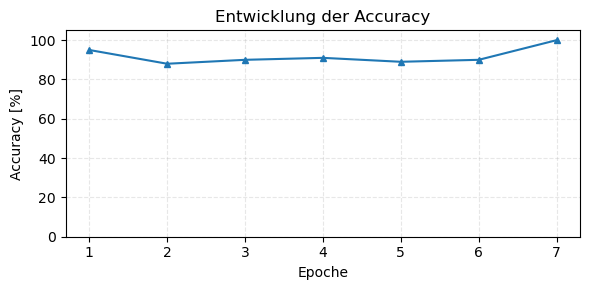

<Figure size 640x480 with 0 Axes>

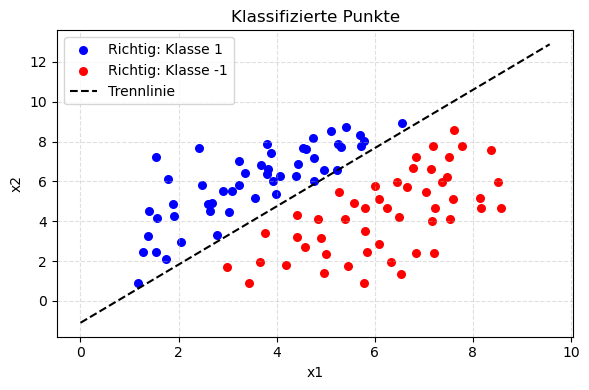

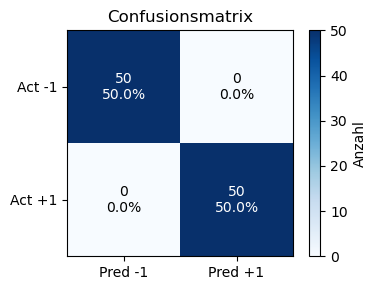

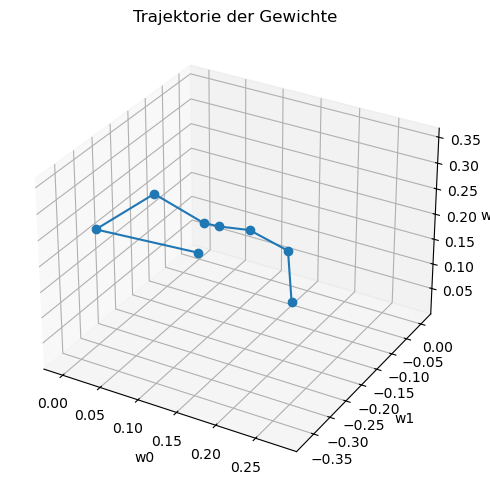

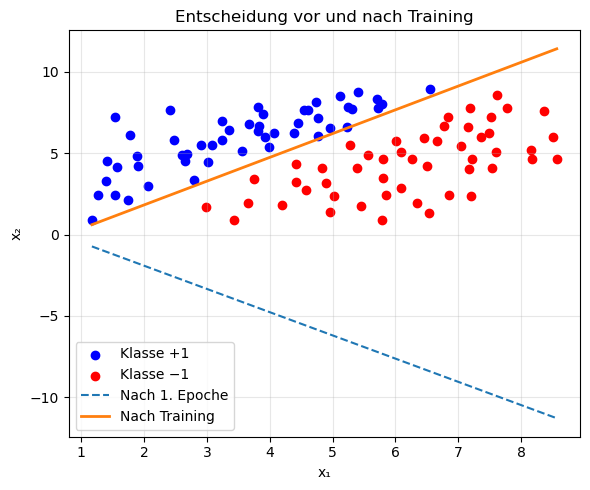

In [9]:
# 1. Ausgabe je Epoche
def print_epoch_stats(gewicht_hist, acc_hist, mse_hist):
    max_epochs = len(gewicht_hist) - 1
    for ep in range(1, max_epochs + 1):
        print(f"Epoch {ep:2d}: w={gewicht_hist[ep-1]}  "
              f"Acc={(1-acc_hist[ep-1])*100:5.1f}%  MSE={mse_hist[ep-1]:.6f}")

# 2. Gewichtsplot
def plot_weights(gewicht_hist):
    max_epochs = len(gewicht_hist) - 1
    n_features = len(gewicht_hist[0])
    plt.figure(figsize=(7, 3))
    for j in range(n_features):
        plt.plot(range(0, max_epochs+1),
                 [g[j] for g in gewicht_hist], marker='o', lw=1.3, label=f"w{j}")
    plt.xlabel('Epoche')
    plt.ylabel('Gewicht')
    plt.title('Gewichtsverlauf')
    plt.grid(ls='--', alpha=.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3. Fehlerkurve (MSE)
def plot_mse_curve(mse_hist):
    max_epochs = len(mse_hist)
    plt.figure(figsize=(7, 3))
    plt.plot(range(1, max_epochs+1), mse_hist, marker='s', lw=1.5)
    plt.yscale('log')
    plt.xlabel('Epoche')
    plt.ylabel('MSE (log)')
    plt.title('Fehlerkurve')
    plt.grid(ls='--', alpha=.3, which='both')
    plt.tight_layout()
    plt.show()

# 4. Accuracy-Kurve
def plot_accuracy_curve(acc_hist):
    max_epochs = len(acc_hist)
    plt.figure(figsize=(6, 3))
    plt.plot(range(1, max_epochs+1), [(1-acc)*100 for acc in acc_hist],
             marker='^', ms=4, lw=1.5)
    plt.xlabel('Epoche')
    plt.ylabel('Accuracy [%]')
    plt.title('Entwicklung der Accuracy')
    plt.ylim(0, 105)
    plt.grid(ls='--', alpha=.3)
    plt.tight_layout()
    plt.show()

# 5. Konfusionsmatrix
def plot_confusion_matrix(results):
    tp_list, tn_list, fp_list, fn_list = classify_with_predictions(results)
    tp, tn, fp, fn = len(tp_list), len(tn_list), len(fp_list), len(fn_list)
    cm = [[tn, fp], [fn, tp]]
    total = tp + tn + fp + fn
    cm_pct = [[v / total * 100 for v in row] for row in cm]

    plt.figure(figsize=(4, 3))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar(label='Anzahl')
    plt.xticks([0, 1], ['Pred -1', 'Pred +1'])
    plt.yticks([0, 1], ['Act -1', 'Act +1'])

    for i in (0, 1):
        for j in (0, 1):
            val, p = cm[i][j], cm_pct[i][j]
            clr = 'white' if val > max(cm[i]) * 0.5 else 'black'
            plt.text(j, i, f"{val}\n{p:.1f}%", ha='center', va='center', color=clr)

    plt.title('Confusionsmatrix')
    plt.tight_layout()
    plt.show()

# 6. Gewichtstrajektorie im 3D-Raum
def plot_weight_trajectory_3d(gewicht_hist):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111, projection='3d')
    w0 = [g[0] for g in gewicht_hist]
    w1 = [g[1] for g in gewicht_hist]
    w2 = [g[2] for g in gewicht_hist]
    ax.plot(w0, w1, w2, marker='o')
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('w2')
    ax.set_title('Trajektorie der Gewichte')
    plt.tight_layout()
    plt.show()

# 7. Entscheidung vor und nach Training
def plot_decision_before_after(data, gewicht_hist, w_final):
    # Datenpunkte nach Klasse trennen
    xs_pos = [x for (lab,x,y) in data if lab==1]
    ys_pos = [y for (lab,x,y) in data if lab==1]
    xs_neg = [x for (lab,x,y) in data if lab==-1]
    ys_neg = [y for (lab,x,y) in data if lab==-1]
    # Erstes Gewicht (nach Epoche 1) und finale Grenze
    w_start = gewicht_hist[0]
    x_vals  = np.linspace(min(xs_pos+xs_neg), max(xs_pos+xs_neg), 200)
    y_start = -(w_start[0] + w_start[1]*x_vals) / w_start[2]
    y_final = -(w_final[0] + w_final[1]*x_vals)   / w_final[2]
    # Plot
    plt.figure(figsize=(6,5))
    plt.scatter(xs_pos, ys_pos, c='blue', label='Klasse +1')
    plt.scatter(xs_neg, ys_neg, c='red',  label='Klasse −1')
    plt.plot(x_vals, y_start, '--', label='Nach 1. Epoche')
    plt.plot(x_vals, y_final,  '-',  label='Nach Training', linewidth=2)
    plt.xlabel('x₁'); plt.ylabel('x₂')
    plt.title('Entscheidung vor und nach Training')
    plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()



    data = load_data_from_csv("adaline.csv")
w, gewicht_hist, mse_hist, acc_hist = adaline_learn(data)

print_epoch_stats(gewicht_hist, acc_hist, mse_hist)
plot_weights(gewicht_hist)
plot_mse_curve(mse_hist)
plot_accuracy_curve(acc_hist)

acc, results = adaline_evaluate(data, w)
plot_confusion_matrix(results)
plot_weight_trajectory_3d(gewicht_hist)
plot_decision_before_after(data, gewicht_hist, w)

**Antwort:**<br>

Erinnern wir uns an die eingangs gestellten Fragen, können wir sie nun beantworten:

Konvergieren die Gewichte zu gewissen Werten?
- Ja, die Gewichte in Abb. 1 stabilisieren sich. Auffällig ist wie schnell das passiert. Meist nach unter 10 Iterationen. Ebenso die Varianz der Gewichte recht niedrig, da sie steht zu den gleichen Werten konvergieren.

Wird der quadratische Fehler tatsächlich kleiner?
 - Die Fehlerkurve in Abb. 2 tendiert zwar kleiner zu werden ist aber keines Falls monoton, da wir das stochastische Gradientenabstiegsverfahren nutzen. Dadurch kann es passieren, dass ein Update für einen Datenpunkt den Fehler für andere Datenpunkte kurzfristig wieder erhöht.
 
Wird die Genauigkeit (accuracy) höher?   
- Ja die Genauigkeit (accuracy) in Abb. 3. Sie steigt bis zu 100% und startet auch schon recht hoch. Also sind unsere Startgewichte mit ca (0,0,0) als Ursprungsebene gut gewählt. Dies liegt an den Klassen -1 und 1, da 0 genau den Mittelwert trifft.

Welche Daten wurden richtig klassifiziert?
- In der Konfusionsmatrix Abb.5 sehen wir, dass alle Punkte richtig klassifiziert wurden und keine falsch. 

### Aufgabe 6: Neuen Datensatz konstruieren


**Aufgabenstellung in eigenen Worten:**<br>

Man soll einen Datensatz konstruieren, der für das implementierte Adaline nicht klassifizierbar ist. Im Anschluss soll erklärt werden, warum das Adaline mit dem neuen Datensatz Schwierigkeiten hat. Zuletzt soll eine mögliche Lösung aufgezeigt werden.

**Annahmen / gegeben:**<br>

Hinweis zur möglichen Lösung des neu aufgeworfenen Problems: "Transformation der Daten, Anpassung der Methode"

**Ansatz:**<br>

Adaline ist ein Modell für lineare Klassifikationen. Daher wird es bei nicht linear separierbaren Problemen keine Lösung bieten. Wir wollen mit vielen Simulationsdurchläufen überprüfen, ob die Varianz hoch ist und wie die fits aussehen. Angelehnt an den Skandal ("AI Winter") um das Buch "Perzeptrons" von Marvin Minsky und Seymour Papert [1] haben wir uns an einem XOR-Problem versucht.

<Figure size 640x480 with 0 Axes>

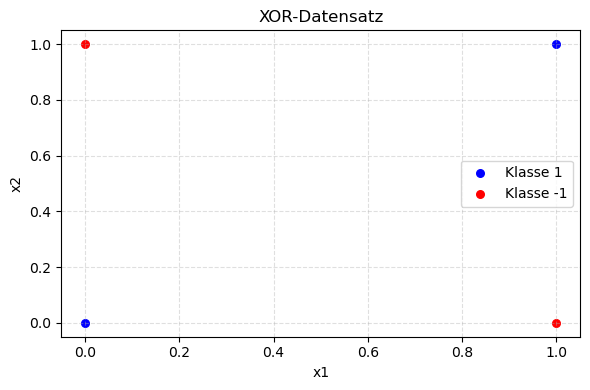

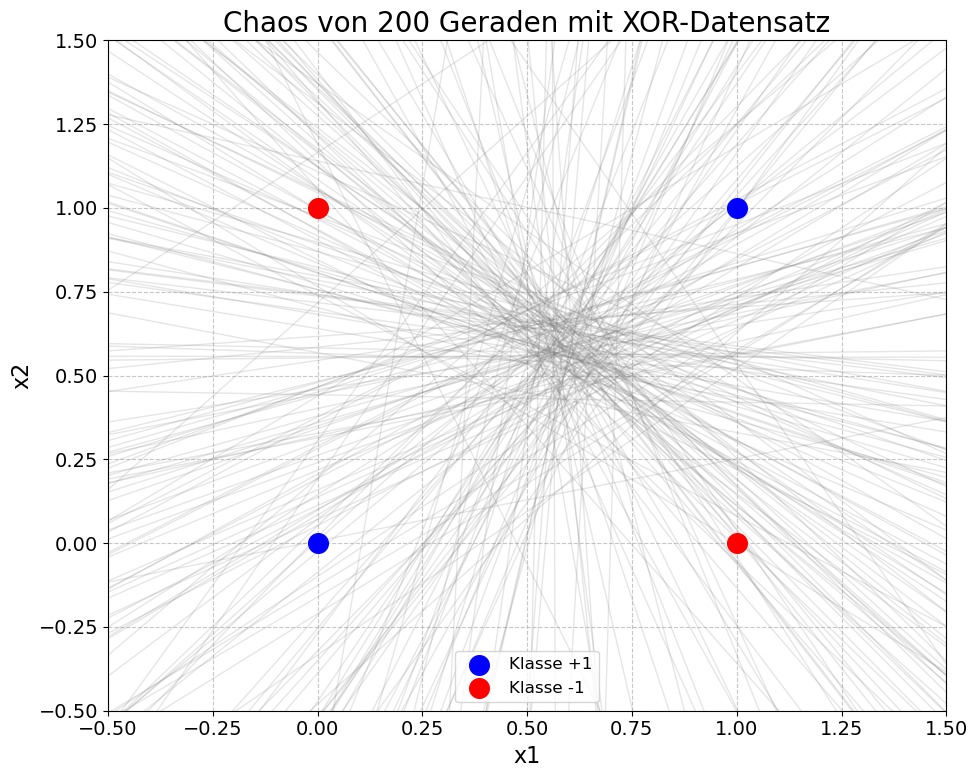

In [10]:
# Daten
data = [
    (1, 0, 0),
    (-1, 0, 1),
    (-1, 1, 0),
    (1, 1, 1)
]

#Plot des XOR-Datensatzes
plot_classified_points(data, x_label='x1', y_label='x2', title='XOR-Datensatz')

# Parameter festlegen
num_runs = 200  
eta = 0.01
max_epochs = 100
all_weights = []

# Trainieren mehrerer Modelle
for run in range(num_runs):
    random.seed(run)
    w = vector(RR, [random.uniform(-0.1, 0.1) for _ in range(3)])
    
    for epoch in range(max_epochs):
        idx = list(range(len(data)))
        random.shuffle(idx)
        
        for i in idx:
            y_i, *features = data[i]
            x_i = vector(RR, [1.0] + features)
            f_x = w.dot_product(x_i)
            delta = -(y_i - f_x)
            w -= eta * vector(RR, [delta * x_i[j] for j in range(len(x_i))])
   
    all_weights.append(w)

# Plot der Ergebnisse
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 14})

# Scatterplot der Datenpunkte
pos_points = [(x, y) for label, x, y in data if label == 1]
neg_points = [(x, y) for label, x, y in data if label == -1]
plt.scatter([p[0] for p in pos_points], [p[1] for p in pos_points], 
           color='blue', s=200, label='Klasse +1', zorder=10)  
plt.scatter([p[0] for p in neg_points], [p[1] for p in neg_points], 
           color='red', s=200, label='Klasse -1', zorder=10)
#plotte alle lines
x_vals = np.linspace(-0.5, 1.5, 100)
for w in all_weights:
    if w[2] != 0:  # Division durch Null vermeiden
        m = -w[1] / w[2]
        b = -w[0] / w[2]
        y_vals = m * x_vals + b
        plt.plot(x_vals, y_vals, color='gray', alpha=0.2, linewidth=1)

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'Chaos von {num_runs} Geraden mit XOR-Datensatz', fontsize=20)
plt.xlabel('x1', fontsize=16)
plt.ylabel('x2', fontsize=16)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Antwort:**<br>

Im Beispiel kann keine Gerade oder Hyperplane die beiden Klassen sauber trennen.
Ein möglicher Ansatz zur Lösung dieser Problematik wäre der Einbau eines 'Hidden Layer', der die Klassifikation wieder möglich macht. Das könnte man durch ein weiteres Feature bewerkstelligen. 
Man erkennt zusätzlich die hohe Varianz des Modells welche durch Regularisierung reduziert werden könnte.


### Aufgabe 7 Plotten von Evasion.csv mit der vorherigen Implementierung des Adalines


**Aufgabenstellung in eigenen Worten:**<br>

Mit den zuvor erstellten Funktionen adaline_learn() und adaline_evaluate() soll ein neuer Datensatz klassifiziert werden.
Im Anschluss sollen alle Beobachtungen festgehalten werden.


**Annahmen / gegeben:**<br>

neuer Datensatz: evasion.csv


**Ansatz:**<br>

Damit eine gute Vergleichbarkeit erreich wird, sollte die Umsetzung komplementär zu den Aufgaben 04 und 05 ablaufen.

<Figure size 640x480 with 0 Axes>

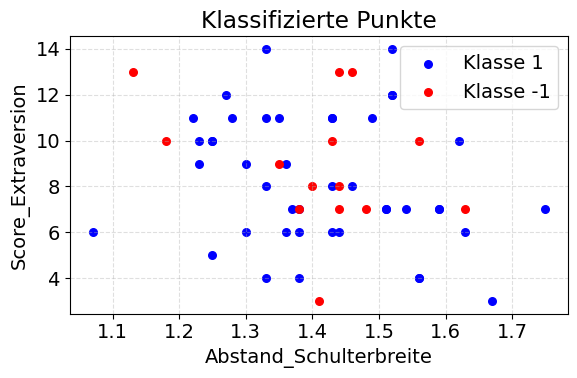

Beendet an Epoch 121: Klassifikationsfehler = 0.2281


<Figure size 640x480 with 0 Axes>

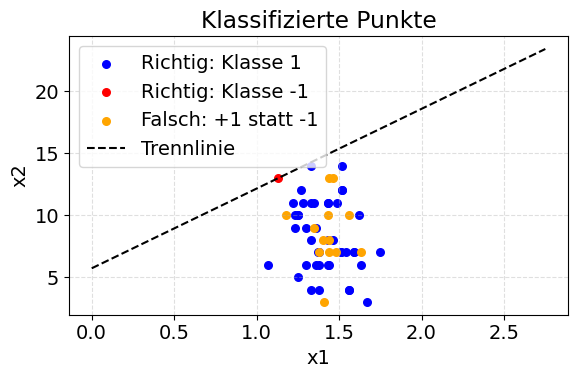

Genauigkeit: 77.19%


In [11]:
# Daten laden
data = load_data_from_csv("evasion.csv",skip_header=True)

# Aufruf
plot_classified_points(data,x_label='Abstand_Schulterbreite',y_label='Score_Extraversion')

w, *_ = adaline_learn(data,gamma=0.2281,eta= 0.0025)
acc, *_ = adaline_evaluate(data, w)
print(f"Genauigkeit: {float(acc):.2%}")

**Antwort:**<br>

Die Punktewolke des Datensatzes evasion.csv ist deutlich schlechter zu klassifizieren als der Datensatz adaline.csv, da die beiden Klassen sich innerhalb der Datenwolke stark überlagern und so keine klare Hyperplane/Gerade gezogen werden kann. Das Modell sucht sich trotzdem einen Datenpunkt oben links, den es richtig mit -1 klassifiziert, damit die Genauigkeit erhöht wird.

### Aufgabe 8 (opt.): neuer (frei verfügbarer) Datensatz mit der vorherigen Implementierung des Adalines


**Aufgabenstellung in eigenen Worten:**<br>

Ähnlich zu Aufgabe 07 soll überprüft werden, wie das Adaline auf einen neuen Datensatz reagiert.

**Annahmen / gegeben:**<br>

Der Lernalgorithmus und die Evaluationsfunktion aus Aufgabe 04 und 05 sollen übernommen werden.
Eine mögliche Schwierigkeit könnte der anders strukturierte Datensatz sein.

**Ansatz:**<br>

- Recherche nach einem bekannten Datensatz, der linear klassifizierbar ist
- Umsetzung einer neuen import-Funktion, um der neuen Datenstruktur gerecht zu werden
- Lernen und Evaluierung durch oben beschriebenes Adaline

<Figure size 640x480 with 0 Axes>

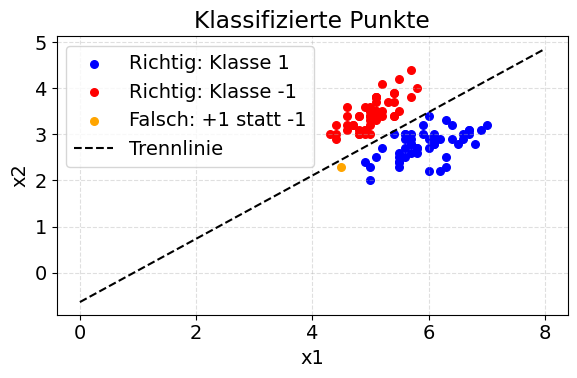

Genauigkeit: 99.00%


In [12]:
def load_two_class_iris(file_path, skip_header=False):
    '''
    Angepasste load_data_from_csv()-Funktion von oben:
    Setosa wurde als Label auf -1 gesetzt, Versicolor auf 1, um eine Klassifizierung möglich zu machen.
    '''

    base_path = os.getcwd()
    file_path = os.path.join(base_path, file_path)

    with open(file_path) as f:
        lines = f.readlines()

    if skip_header:
        lines = lines[1:]

    data = []
    for line in lines:
        parts = line.strip().split(',')
        sepal_length = float(parts[0])
        sepal_width = float(parts[1])
        label_str = parts[-1].strip('"')

        #print(f"Label: {label_str}")  # <-- Ausgabe aller Klassenlabels

        if label_str == "Setosa":
            label = -1
        elif label_str == "Versicolor":
            label = 1
        else:
            continue  # überspringe andere Klassen

        data.append((label, sepal_length, sepal_width))

    #print(f"Gefilterte Daten: {len(data)} Zeilen")
    #labels = set([row[0] for row in data])
    #print(f"Labels in gefiltertem Datensatz: {labels}")
    return data

data = load_two_class_iris("iris.csv", skip_header=True)
#labels = set([row[0] for row in data])
#print("Labels nach Filterung:", labels)  # Sollte {1, -1} sein

w, w_hist, mse_hist, error_hist = adaline_learn(data, eta=0.001, gamma=0.001, max_epochs=1000)

acc, *_ = adaline_evaluate(data, w)
print(f"Genauigkeit: {float(acc):.2%}")

**Antwort:**<br>

Während der Implementierung ist aufgefallen, dass der Datensatz iris.csv mehrere Hürden für unser Adaline darstellt:
1) Die Anpassung auf einen anderen Datensatz war schwieriger als gedacht, da mehr Features vorhanden sind. Auch die Benennung der Targets war in Strings, nicht in Integern angegeben. Eine richtige Vorverarbeitung der Daten war also essentiell.
2) eta und gamma mussten viel spezifischer gewählt werden, um eine sinvolle Klassifizierung zu erhalten. Mit falsch eingestellten Lernschritten wurde häufig alles falsch klassifiziert. Vermutung: Durch das auslassen der features petal.lenght und petal.witdth erhält das Modell weniger Merkmale zur Trennung. Es könnte auch ein höheres Rauschen als in adaline.csv geben.

Allgemein:<br>

Obwohl wir die Merkmale der Blumen verringert haben (die obere Blattbreite und Blattlänge "petal" wurde weggelassen), sind die Lilienarten Setosa und Versicolor allein durch ihre unteren Blätter mit Länge und Breite ("sepal") voneinander gut trennbar. Die Merkmale "sepal" und "petal" könnten also eine große Korrelation aufweisen. Mittels PCA könnte man gegebenfalls eine Dimensionalitätsreduktion durchführen, um den ganzen Datensatz einfacher zu strukturieren.

### Quellen:

[1] Minsky, Papert. 1988. "Perzeptrons". Extended Version. Massachusetts: MIT (Massachusetts Institute of Technology). ISBN 0-262-63111-3

### Session-Info

In [13]:
# session_info.show() # - https://pypi.org/project/session-info/
# letzte Ausführung auf MacOS 15.5 Sequoia, Sagemath 10.6, Docker-Container Linux / adm64